<a href="https://colab.research.google.com/github/icarocarmona/pos-tech-dtat/blob/main/desafios/Desafio_Analise_base_de_carros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/FIAP/Pos_Tech_DTAT/61a634996879d5c1384af6f567e29659ad68b727/Desafio/cars.csv')
df.head()

,id,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,...,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,3,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,...,sedan,4,2,hybrid_gas_electric,6.0,37.8,42.1,35.8,34.7,4
1,6,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,16
2,7,Ford,Focus,2014,97027,27,37,159,146,2.0,...,sedan,4,2,gas,6.0,38.3,43.7,38.0,33.2,13
3,8,Honda,Civic,2016,95396,31,42,158,138,1.5,...,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,26
4,9,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     52 non-null     int64  
 1   brand                  52 non-null     object 
 2   model                  52 non-null     object 
 3   year                   52 non-null     int64  
 4   miles                  52 non-null     int64  
 5   city_mileage           52 non-null     int64  
 6   highway_mileage        52 non-null     int64  
 7   horsepower             52 non-null     int64  
 8   torque                 52 non-null     int64  
 9   engine_capacity_litre  52 non-null     float64
 10  fuel_capacity          52 non-null     float64
 11  num_cylinder           52 non-null     int64  
 12  num_seat               52 non-null     int64  
 13  num_owners             52 non-null     int64  
 14  price                  52 non-null     int64  
 15  link    

In [ ]:
df.columns

Index(['id', 'brand', 'model', 'year', 'miles', 'city_mileage',
       'highway_mileage', 'horsepower', 'torque', 'engine_capacity_litre',
       'fuel_capacity', 'num_cylinder', 'num_seat', 'num_owners', 'price',
       'link', 'condition', 'type', 'doors', 'wheel_drive', 'engine_type',
       'speed_levels', 'front_headroom', 'front_legroom', 'rear_headroom',
       'rear_legroom', 'service_records'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,52.0,31.365385,15.378912,3.0,18.750,31.5,44.25,57.0
year,52.0,2018.673077,1.396370,2014.0,2018.000,2019.0,2019.25,2022.0
miles,52.0,33901.250000,22700.646139,5000.0,16454.750,27448.5,42442.00,97027.0
city_mileage,52.0,29.038462,5.947356,17.0,26.500,30.0,30.00,55.0
highway_mileage,52.0,37.423077,4.136619,24.0,35.750,38.0,40.00,49.0
horsepower,52.0,176.865385,33.793507,143.0,152.000,159.5,192.00,288.0
torque,52.0,177.923077,47.256433,99.0,138.000,181.0,192.00,294.0
engine_capacity_litre,52.0,1.832692,0.379743,1.4,1.500,2.0,2.00,3.5
fuel_capacity,52.0,14.232692,2.603973,7.0,12.400,13.6,15.05,19.0
num_cylinder,52.0,4.038462,0.277350,4.0,4.000,4.0,4.00,6.0


In [ ]:
df.shape

(52, 27)

In [ ]:
df.isnull().sum()

id                        0
brand                     0
model                     0
year                      0
miles                     0
city_mileage              0
highway_mileage           0
horsepower                0
torque                    0
engine_capacity_litre     0
fuel_capacity             0
num_cylinder              0
num_seat                  0
num_owners                0
price                     0
link                      0
condition                51
type                      0
doors                     0
wheel_drive               0
engine_type               0
speed_levels              1
front_headroom            0
front_legroom             0
rear_headroom             0
rear_legroom              0
service_records           0
dtype: int64

In [ ]:
# como nao tem dados na coluna condition, vou reover
df.drop('condition', axis=1, inplace=True)

In [ ]:
df.loc[7]

id                                                                      13
brand                                                                Honda
model                                                              Clarity
year                                                                  2018
miles                                                                29674
city_mileage                                                            44
highway_mileage                                                         40
horsepower                                                             212
torque                                                                  99
engine_capacity_litre                                                  1.5
fuel_capacity                                                          7.0
num_cylinder                                                             4
num_seat                                                                 5
num_owners               

In [ ]:
df.drop(7, axis=0, inplace=True)

In [ ]:
cars = df[[ 'brand', 'model', 'year', 'miles', 'city_mileage',
       'highway_mileage', 'horsepower', 'torque', 'engine_capacity_litre',
       'fuel_capacity', 'num_cylinder', 'num_seat', 'num_owners', 'price',
       'type', 'doors', 'wheel_drive', 'engine_type', 'speed_levels',
       'front_headroom', 'front_legroom', 'rear_headroom', 'rear_legroom',
       'service_records']]
cars.head()

,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,...,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,8.9,...,sedan,4,2,hybrid_gas_electric,6.0,37.8,42.1,35.8,34.7,4
1,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,14.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,16
2,Ford,Focus,2014,97027,27,37,159,146,2.0,12.4,...,sedan,4,2,gas,6.0,38.3,43.7,38.0,33.2,13
3,Honda,Civic,2016,95396,31,42,158,138,1.5,12.4,...,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,26
4,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,14.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,5


processing

In [ ]:
from sklearn.preprocessing import LabelEncoder

cars['brand'] = LabelEncoder().fit_transform(cars['brand'])
cars['model'] = LabelEncoder().fit_transform(cars['model'])
cars['type'] = LabelEncoder().fit_transform(cars['type'])
cars['engine_type'] = LabelEncoder().fit_transform(cars['engine_type'])



<ipython-input-13-952fe9a39e22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['brand'] = LabelEncoder().fit_transform(cars['brand'])
<ipython-input-13-952fe9a39e22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['model'] = LabelEncoder().fit_transform(cars['model'])
<ipython-input-13-952fe9a39e22>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [ ]:
cars.head(3)

,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,...,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,0,13,2019,27173,43,42,149,294,1.5,8.9,...,0,4,2,1,6.0,37.8,42.1,35.8,34.7,4
1,3,2,2017,76941,29,38,146,132,2.0,14.0,...,0,4,2,0,6.0,39.0,42.2,37.0,35.7,16
2,1,3,2014,97027,27,37,159,146,2.0,12.4,...,0,4,2,0,6.0,38.3,43.7,38.0,33.2,13


In [ ]:
correlacao_matrix = cars.corr().round(2)

<Axes: >

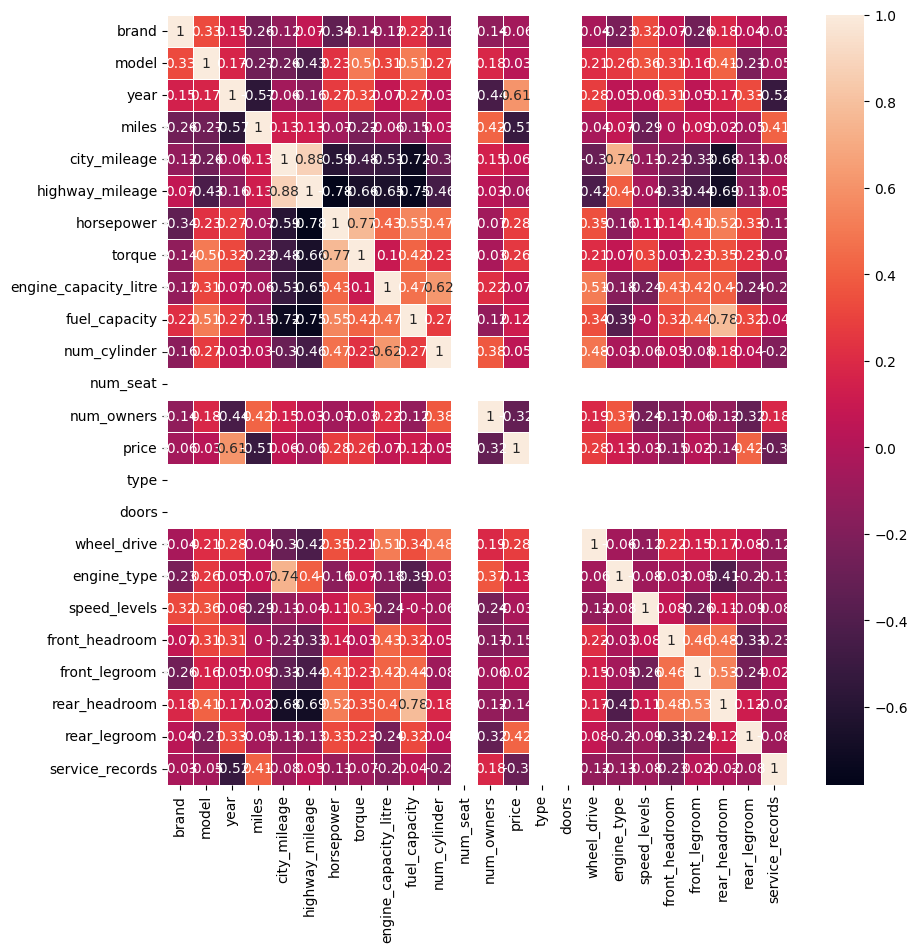

In [ ]:
fig, aux = plt.subplots(figsize=(10,10))
sns.heatmap(data=correlacao_matrix, annot=True, linewidths=0.5, ax=aux)

<ipython-input-17-474082e8b847>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao_matrix = cars2.corr().round(2)


<Axes: >

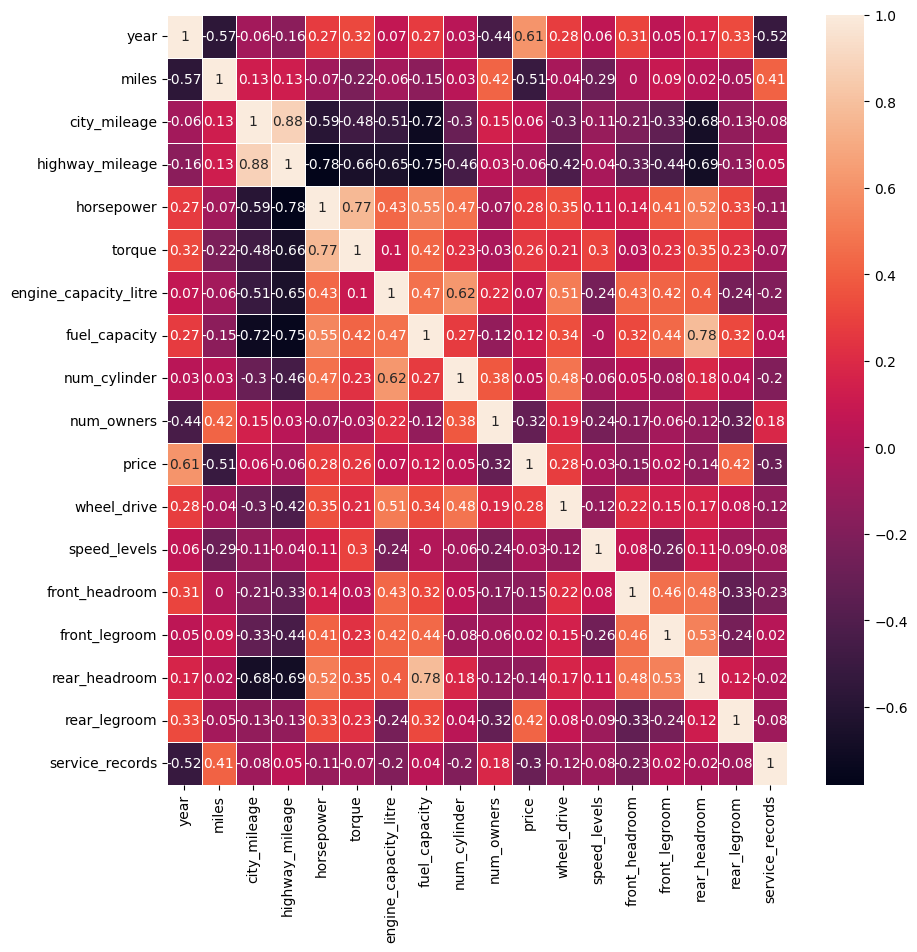

In [ ]:
cars2 = df[[ 'brand',  'year', 'miles', 'city_mileage',
       'highway_mileage', 'horsepower', 'torque', 'engine_capacity_litre',
       'fuel_capacity', 'num_cylinder','num_owners', 'price',
       'type', 'wheel_drive', 'engine_type', 'speed_levels',
       'front_headroom', 'front_legroom', 'rear_headroom', 'rear_legroom',
       'service_records']]

correlacao_matrix = cars2.corr().round(2)
fig, aux = plt.subplots(figsize=(10,10))
sns.heatmap(data=correlacao_matrix, annot=True, linewidths=0.5, ax=aux)

Text(0.5, 1.0, 'Histograma da variável valor')

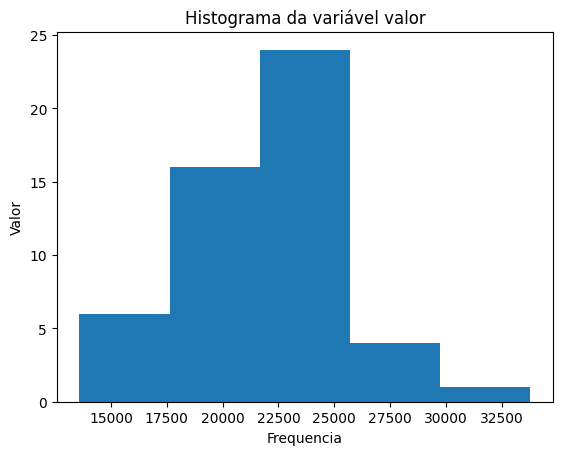

In [ ]:
plt.hist(cars2["price"],bins=5)
plt.xlabel("Frequencia")
plt.ylabel("Valor")
plt.title("Histograma da variável valor")

In [ ]:
cars2["raiz_price"] = np.sqrt(cars2['price'])

<ipython-input-19-9fe540a02357>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars2["raiz_price"] = np.sqrt(cars2['price'])


Text(0.5, 1.0, 'Histograma da variável valor')

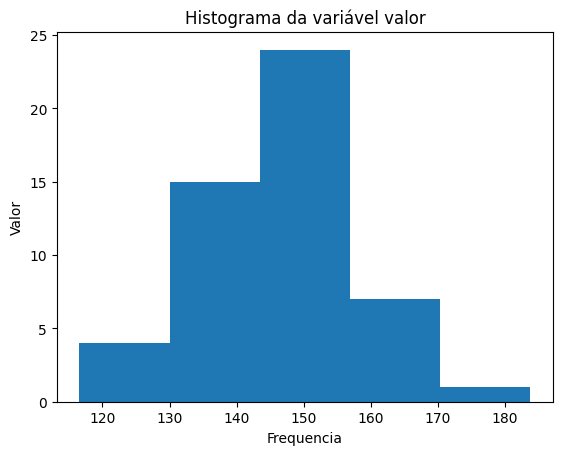

In [ ]:
plt.hist(cars2["raiz_price"],bins=5)
plt.xlabel("Frequencia")
plt.ylabel("Valor")
plt.title("Histograma da variável valor")

Text(0, 0.5, 'Ano')

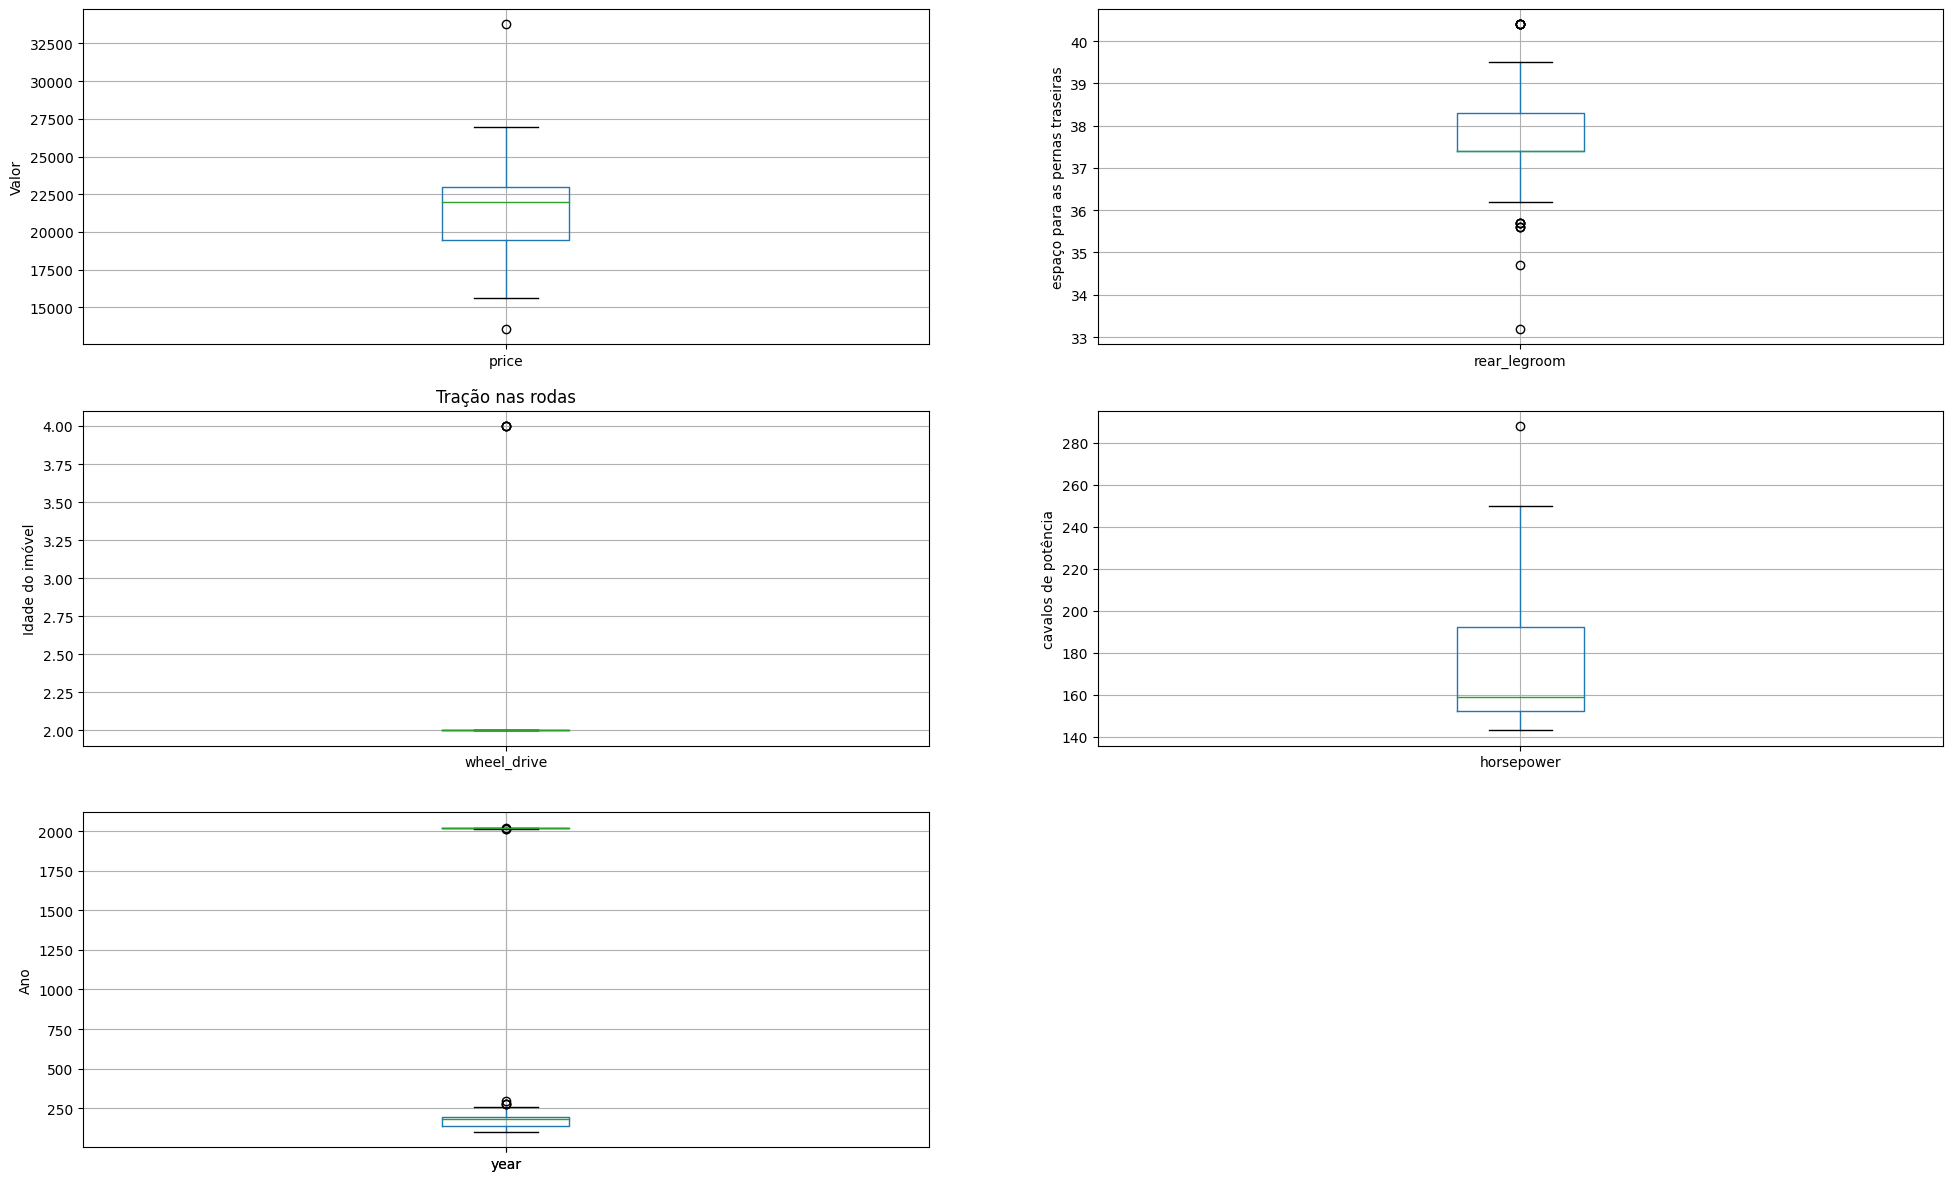

In [ ]:
plt.figure(figsize=(24,20))

plt.subplot(4,2,1)
fig = cars2.boxplot(column = "price")
fig.set_title("")
fig.set_ylabel("Valor")

plt.subplot(4,2,2)
fig = cars2.boxplot(column = "rear_legroom")
fig.set_title("")
fig.set_ylabel("espaço para as pernas traseiras")

plt.subplot(4,2,3)
fig = cars2.boxplot(column = "wheel_drive")
fig.set_title("Tração nas rodas")
fig.set_ylabel("Idade do imóvel")

plt.subplot(4,2,4)
fig = cars2.boxplot(column = "horsepower")
fig.set_title("")
fig.set_ylabel("cavalos de potência")

plt.subplot(4,2,5)
fig = cars2.boxplot(column = "torque")
fig.set_title("")
fig.set_ylabel("Torque")

plt.subplot(4,2,5)
fig = cars2.boxplot(column = "year")
fig.set_title("")
fig.set_ylabel("Ano")

In [ ]:
cars2.groupby('year')['year'].count()

year
2014     1
2015     1
2016     2
2017     4
2018     8
2019    22
2020    12
2022     1
Name: year, dtype: int64

In [ ]:
cars = cars2[['price', 'rear_legroom', 'horsepower','wheel_drive', 'torque',  'year']]
cars.head()

,price,rear_legroom,horsepower,wheel_drive,torque,year
0,25655,34.7,149,2,294,2019
1,15590,35.7,146,2,132,2017
2,13590,33.2,159,2,146,2014
3,20590,37.4,158,2,138,2016
4,16787,35.7,147,2,132,2019


<Axes: >

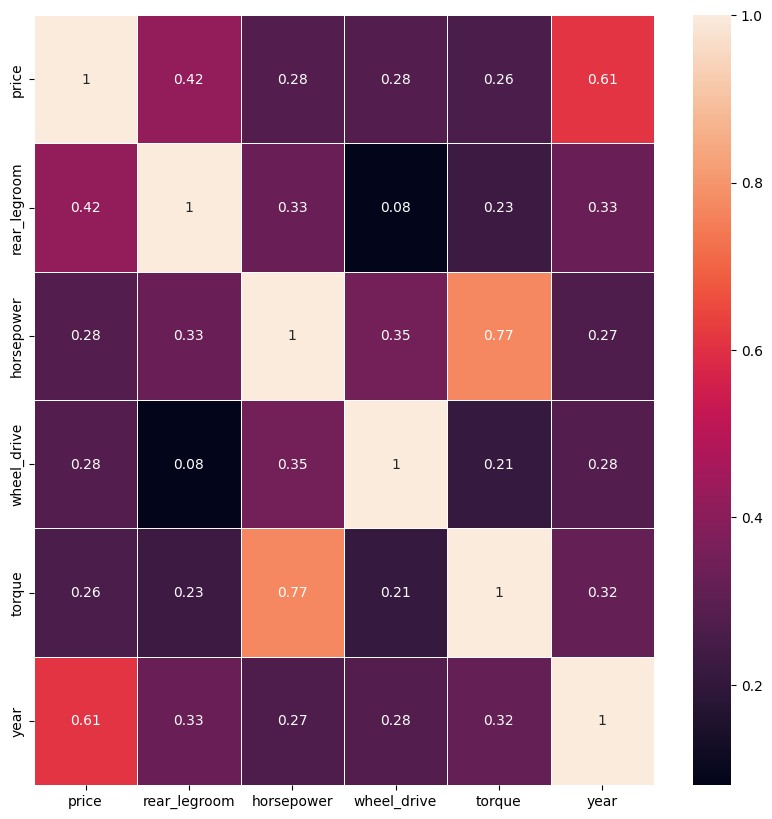

In [ ]:
correlacao_matrix = cars.corr().round(2)
fig, aux = plt.subplots(figsize=(10,10))
sns.heatmap(data=correlacao_matrix, annot=True, linewidths=0.5, ax=aux)

Text(0.5, 1.0, 'ano do carro x valor')

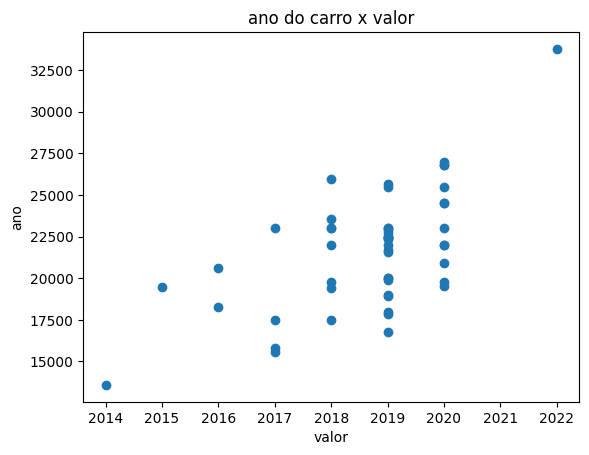

In [ ]:
plt.scatter( "year","price", data=cars)
plt.xlabel("valor")
plt.ylabel("ano")
plt.title("ano do carro x valor")

<Axes: xlabel='wheel_drive', ylabel='price'>

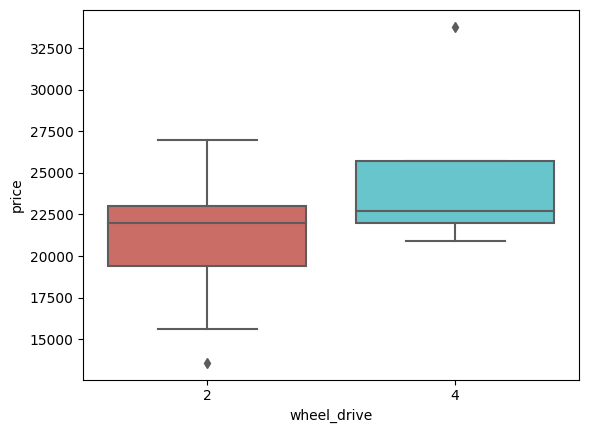

In [ ]:
sns.boxplot(data=cars, x="wheel_drive", y="price", palette="hls")

<Axes: xlabel='torque', ylabel='price'>

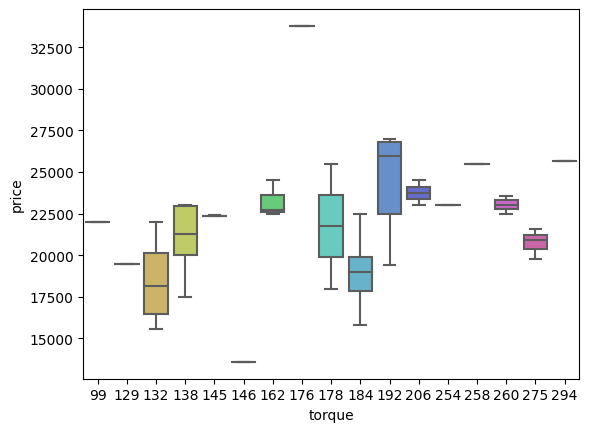

In [ ]:
sns.boxplot(data=cars, x="torque", y="price", palette="hls")

<Axes: xlabel='horsepower', ylabel='price'>

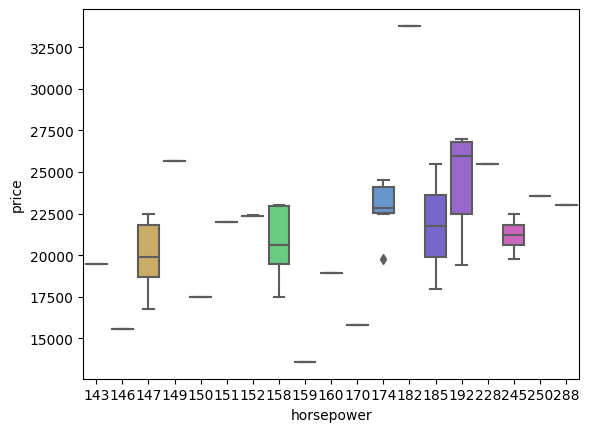

In [ ]:
sns.boxplot(data=cars, x="horsepower", y="price", palette="hls")

In [ ]:
cars.groupby('horsepower')['horsepower'].count()

horsepower
143     1
146     1
147     7
149     1
150     1
151     1
152     2
158    11
159     1
160     1
170     1
174     6
182     1
185     2
192     7
228     1
245     4
250     1
288     1
Name: horsepower, dtype: int64

In [ ]:
cars.groupby('rear_legroom')['rear_legroom'].count()

rear_legroom
33.2     1
34.7     1
35.6     3
35.7     4
36.2     1
36.5     2
37.4    20
38.1     4
38.3     3
39.1     4
39.5     1
40.4     7
Name: rear_legroom, dtype: int64

<Axes: xlabel='rear_legroom', ylabel='price'>

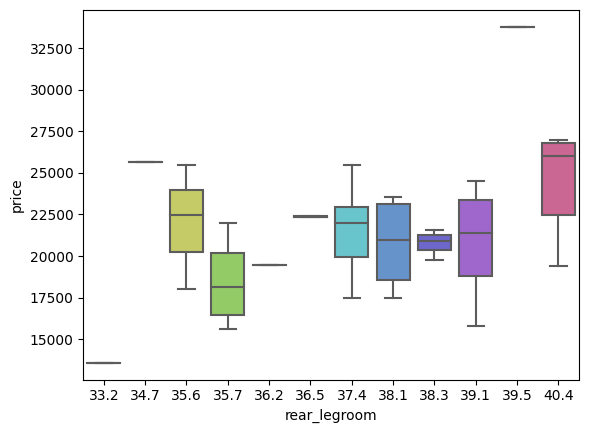

In [ ]:
sns.boxplot(data=cars, x="rear_legroom", y="price", palette="hls")

In [ ]:
# regressão linear múltipla
from sklearn.linear_model import LinearRegression

# criando um obj de regressão linear
lr = LinearRegression()

In [ ]:
#X contem as variáveis preditoras ou independentes
X = cars[[ 'rear_legroom', 'horsepower','wheel_drive', 'torque',  'year']]

# y variáveis target ou dependente
y = cars[['price']]


In [ ]:
from sklearn.model_selection import train_test_split

# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = 101)

In [ ]:
#treinando o modelo
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Calculando o valor predito da variável resposta na amostra de teste
y_pred = lr.predict(X_test)

In [ ]:
print('Intercepto:', lr.intercept_)

Intercepto: [-2455570.23269977]


In [ ]:
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(lr.coef_))], axis=1)
coefficients

,0,0
0,rear_legroom,457.995432
1,horsepower,-2.917252
2,wheel_drive,853.817555
3,torque,1.013621
4,year,1217.889483


In [ ]:
def plt_regplot(y_test, y_pred):
  fig = plt.figure(figsize=(8,6), dpi=80)
  plt.rcParams.update({'font.size':14})
  ax = sns.regplot(x = y_test, y = y_pred)
  ax.set(xlabel='y real', ylabel='y predito')
  ax = plt.plot(y_test,y_test, '--r')

  plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def avaliando_modelo(ytest, ypred):
  plt_regplot(ytest, ypred)
  # avaliando o modelo
  MAE = mean_absolute_error(ytest, ypred)
  MSE = mean_squared_error(ytest, ypred)
  r2 = r2_score(ytest, ypred)

  print('MAE', MAE) # é a média do valor absoluto dos erros
  print('MSE', MSE) # é a média dos erros quadráticos
  print('r²', r2) # R-quadrado

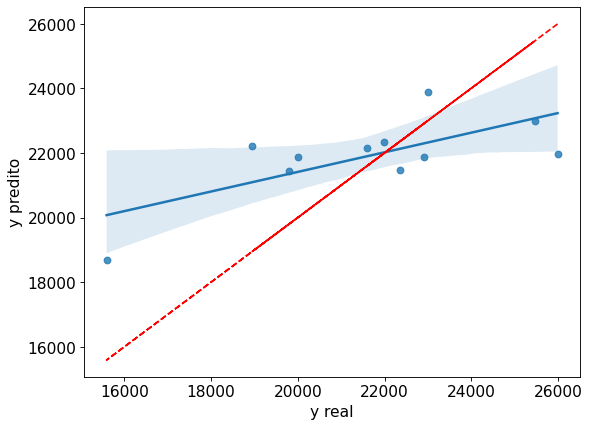

MAE 1821.8442336160012
MSE 4696231.019501835
r² 0.4098473887017846


In [ ]:
avaliando_modelo(y_test, y_pred)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#criando o modelo
model_dtr = DecisionTreeRegressor(random_state=101, max_depth=10)
model_dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=101)

In [ ]:
y_pred_mode_dtr = model_dtr.predict(X_test)

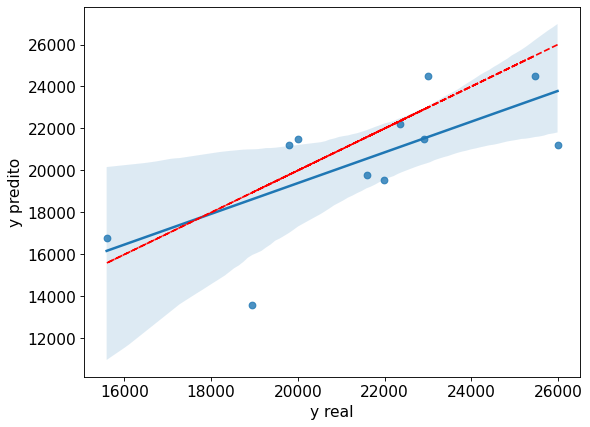

MAE 2048.5454545454545
MSE 6524944.545454546
r² 0.1800418152162111


In [ ]:
avaliando_modelo(y_test,y_pred_mode_dtr)

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR(kernel= 'linear')

In [ ]:
svr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [ ]:
  y_pred_svr = svr.predict(X_test)

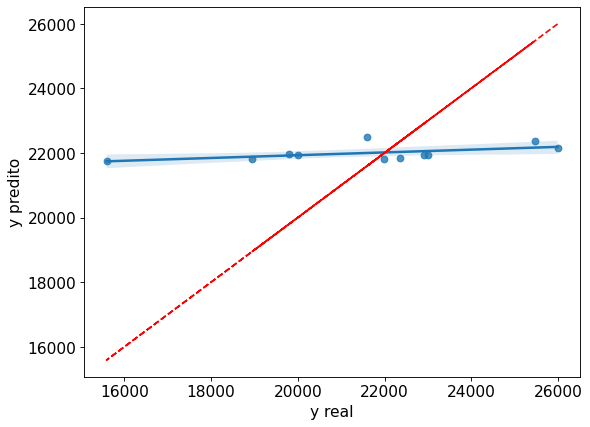

MAE 2155.499808699346
MSE 7479335.041509803
r² 0.06010818309583987


In [ ]:
avaliando_modelo(y_test, y_pred_svr)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Defina os modelos que você deseja testar
models = [
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC())
]

# Loop através dos modelos e avalie o desempenho
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=2)  # Substitua X e y pelos seus dados
    print(f'Modelo: {name}')
    print(f'Acurácia média: {scores.mean()}')
    print(f'Desvio padrão da acurácia: {scores.std()}')
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: 

Modelo: Naive Bayes
Acurácia média: 0.05
Desvio padrão da acurácia: 0.0

Modelo: Decision Tree
Acurácia média: 0.07500000000000001
Desvio padrão da acurácia: 0.025



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Modelo: Random Forest
Acurácia média: 0.07500000000000001
Desvio padrão da acurácia: 0.025

Modelo: Support Vector Machine
Acurácia média: 0.05
Desvio padrão da acurácia: 0.0



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
